## Problem Statement:

#### Given an Airfare and Demand 2002Q4 dataset and attribute information (which are present in the Data Folder). 

#### Build a linear regression model on the dataset to predict the price of the airfare.

In [33]:
# Import Needed Libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [34]:
# Assigning Column Names from Attribute Info file.
col_names = ['City 1', 'City 2', 'Average Fare', 'Distance', 'Average weekly passengers', 'market leading airline', 'MLA market share', 'MLA Average fare', 'Low price airline', 'LPA market share', 'Price']

In [35]:
# Reading the CSV Data Set
data = pd.read_csv("./data/Airfare and Demand 2002Q4.csv", sep='\s+', header = None, names = col_names)

In [36]:
# Getting the DataType of the columns
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   City 1                     1000 non-null   object 
 1   City 2                     1000 non-null   object 
 2   Average Fare               1000 non-null   float64
 3   Distance                   1000 non-null   int64  
 4   Average weekly passengers  1000 non-null   float64
 5   market leading airline     1000 non-null   object 
 6   MLA market share           1000 non-null   float64
 7   MLA Average fare           1000 non-null   float64
 8   Low price airline          1000 non-null   object 
 9   LPA market share           1000 non-null   float64
 10  Price                      1000 non-null   float64
dtypes: float64(6), int64(1), object(4)
memory usage: 86.1+ KB
None


In [37]:
print(data.head())

  City 1 City 2  Average Fare  Distance  Average weekly passengers  \
0    CAK    ATL        114.47       528                     424.56   
1    CAK    MCO        122.47       860                     276.84   
2    ALB    ATL        214.42       852                     215.76   
3    ALB    BWI         69.40       288                     606.84   
4    ALB    ORD        158.13       723                     313.04   

  market leading airline  MLA market share  MLA Average fare  \
0                     FL             70.19            111.03   
1                     FL             75.10            123.09   
2                     DL             78.89            223.98   
3                     WN             96.97             68.86   
4                     UA             39.79            161.36   

  Low price airline  LPA market share   Price  
0                FL             70.19  111.03  
1                DL             17.23  118.94  
2                CO              2.77  167.12  
3 

In [38]:
# Getting the overall information of the numerical data present in the data set.
print(data.describe())

       Average Fare     Distance  Average weekly passengers  MLA market share  \
count    1000.00000  1000.000000                1000.000000       1000.000000   
mean      163.37542  1056.973000                 672.279140         60.128590   
std        55.36547   643.203251                 766.519254         19.367779   
min        50.52000   108.000000                 181.410000         17.680000   
25%       125.97500   553.500000                 257.197500         46.510000   
50%       161.34500   919.000000                 404.780000         59.240000   
75%       197.39250  1452.500000                 769.912500         73.510000   
max       401.23000  2724.000000                8950.760000        100.000000   

       MLA Average fare  LPA market share        Price  
count        1000.00000       1000.000000  1000.000000  
mean          166.64756         34.551480   143.193090  
std            62.66014         27.096999    47.229184  
min            50.52000          1.060000 

**Checking if there's any missing values in the data set.**

In [39]:
data.isnull().sum()

City 1                       0
City 2                       0
Average Fare                 0
Distance                     0
Average weekly passengers    0
market leading airline       0
MLA market share             0
MLA Average fare             0
Low price airline            0
LPA market share             0
Price                        0
dtype: int64

### Building Linear Regression Model on the Data

In [40]:
X = data[["Average Fare", "Distance", "Average weekly passengers",
        "MLA market share", "MLA Average fare", "LPA market share"]]
y = data['Price']

In [41]:
# Train-test split (33% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [42]:
# Fit model
lm = LinearRegression()
lm.fit(X_train, y_train)
pred_test = lm.predict(X_test)

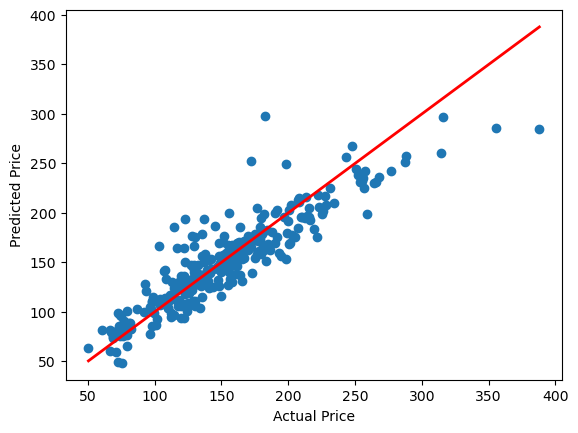

In [43]:
# Scatter plot
plt.scatter(y_test, pred_test)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', linewidth=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()